In [1]:
import matplotlib as mpl
import pandas as pd
import numpy as np
import scipy

In [2]:
# make a table with data
# steps
download_url = (
   "https://raw.githubusercontent.com/fivethirtyeight/""data/master/college-majors/recent-grads.csv")

In [3]:
df = pd.read_csv(download_url)
# making a DataFrame structure
# столбцы - Series, строки которых это это их элементы

In [4]:
type(df)

pandas.core.frame.DataFrame

In [5]:
pd.set_option("display.max.columns", None)

In [6]:
df.head()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,1849,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,556,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,558,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,1069,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,23170,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972


In [7]:
%matplotlib inline

<AxesSubplot: xlabel='Rank'>

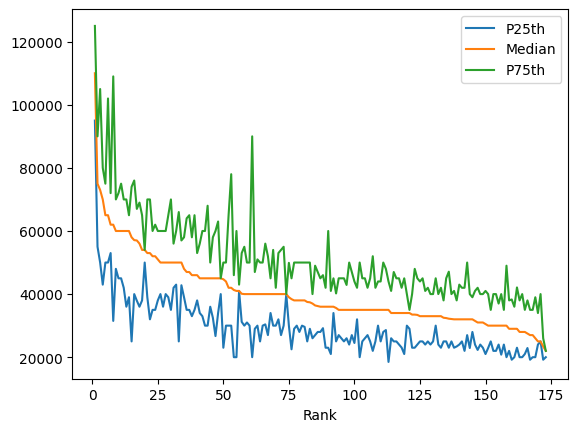

In [8]:
# make few different graphs in pandas
# линейный график
df.plot(x="Rank", y=["P25th", "Median", "P75th"])

<AxesSubplot: ylabel='Frequency'>

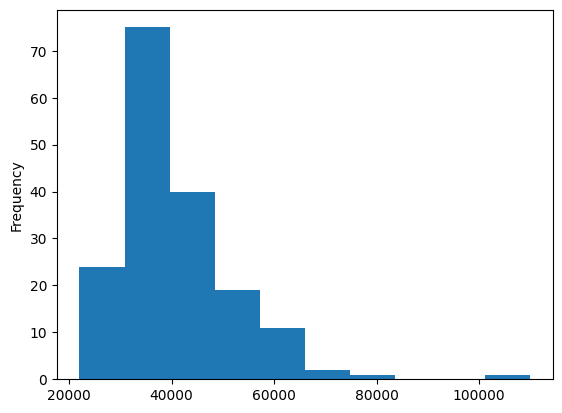

In [9]:
# гистограмма
# столбцы из DataFrame - объекты Series
median_column = df["Median"]
median_column.plot(kind="hist")

<AxesSubplot: xlabel='Major'>

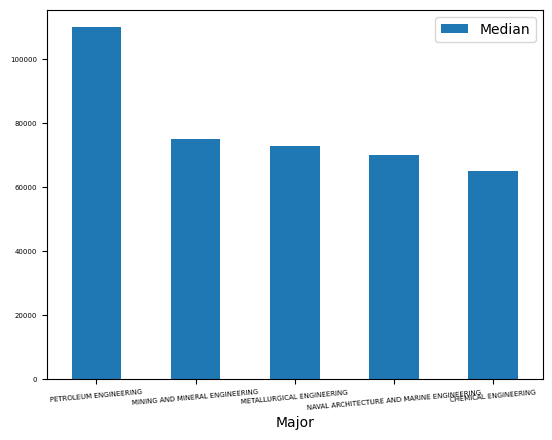

In [10]:
# исследуем правый крайний столбец
top_5 = df.sort_values(by="Median", ascending=False).head()
top_5.plot(x="Major", y="Median", kind="bar", rot=5, fontsize=5)

<AxesSubplot: xlabel='Major'>

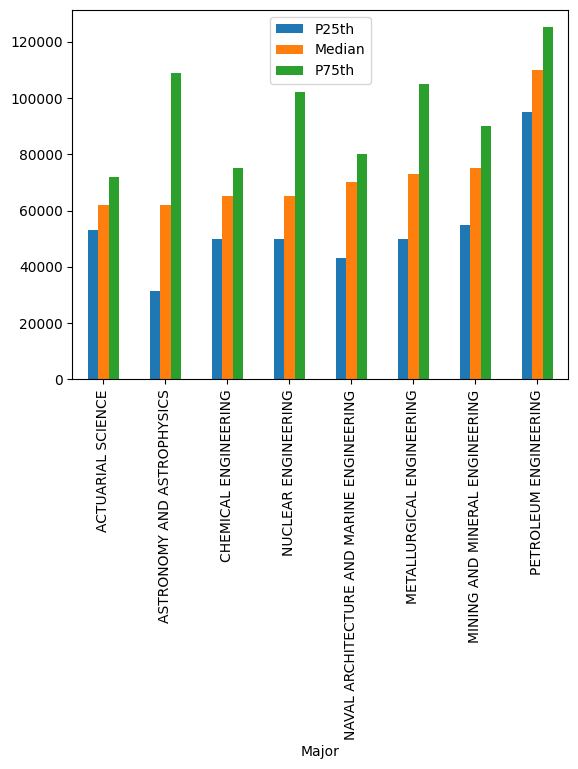

In [11]:
# исследуем поподробнее
top_medians = df[df["Median"] > 60000].sort_values("Median")
top_medians.plot(x="Major", y=["P25th", "Median", "P75th"], kind="bar")

<AxesSubplot: xlabel='Median', ylabel='Unemployment_rate'>

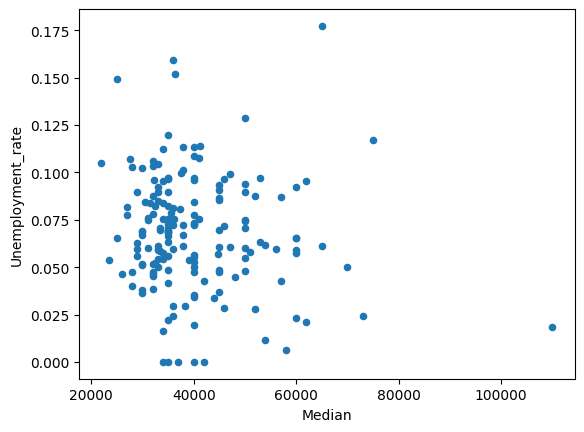

In [12]:
# графики рассеивания (найти корреляцию)
df.plot(x="Median", y="Unemployment_rate", kind="scatter")
# нет значительной корреляции

In [13]:
# посмотрим на корреляцию методом corr

x = df["Median"]
y = df["Unemployment_rate"]
x.corr(y)
# no linear correlation

-0.1088332938973364

In [14]:
xy = pd.DataFrame({'x-values': x, 'y-values': y})
corr_matrix = xy.corr()
xy.corr()

,x-values,y-values
x-values,1.000000,-0.108833
y-values,-0.108833,1.000000


In [15]:
y.corr(x)

-0.1088332938973364

In [16]:
x.corr(y, method='spearman')

-0.07973442560914434

In [17]:
x.corr(y, method='kendall')

-0.05062361990827873

In [18]:
# построить по точкам МНК (линейная регрессия)
slope, intercept, r, p, stderr = scipy.stats.linregress(x, y)
line = f'Regression line: y={intercept:.2f}+{slope:.2f}x, r={r:.2f}'
line

'Regression line: y=0.08+-0.00x, r=-0.11'

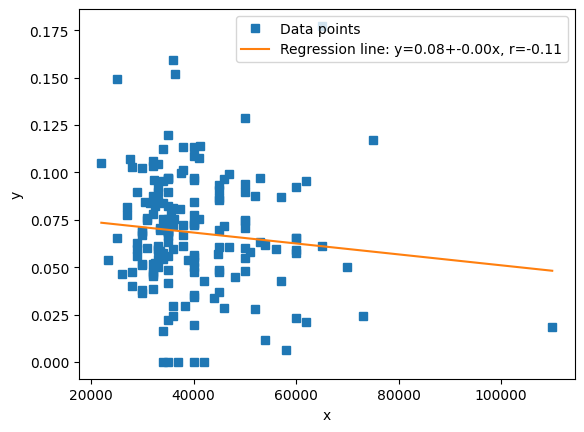

In [19]:
fig, ax = mpl.pyplot.subplots()
ax.plot(x, y, linewidth=0, marker='s', label='Data points')
ax.plot(x, intercept + slope * x, label=line)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend(facecolor='white')
mpl.pyplot.show()

In [20]:
# другие виды регрессии

In [21]:
# график со свечами

In [22]:
# group by


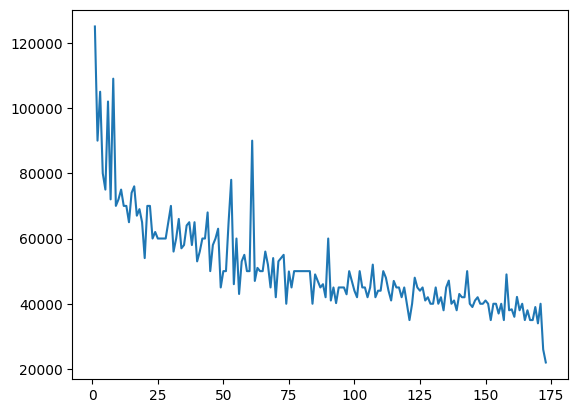

In [23]:
# make few different graphs in matplotlib
# an example of the same linear graph using matplotlib
mpl.pyplot.plot(df["Rank"], df["P75th"])